In [ ]:
# for importing file
import pandas as pd
import numpy as np

# for logistic regresssion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for import json file
import json  

# for uploading file from gdrive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
# loading the dataset to a Pandas DataFrame
df = pd.read_json(r'/content/drive/MyDrive/json/transactions.json', lines=True)

In [ ]:
# first 15 rows of the dataset
pd.set_option('display.max_columns', None)
df.head(15)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,05,01,online_gifts,02/2021,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,550.82,,,,False,,,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,,US,05,01,rideshare,01/2026,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,560.62,,,,False,,,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,05,01,personal care,12/2031,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,808.61,,,,False,,,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,808.61,,,,True,,,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,REVERSAL,False,,820.15,,,,True,,,False


In [ ]:
df.shape

(641914, 29)

In [ ]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,641914.0,5.547701e+08,2.546884e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.862277e+08,9.999853e+08
customerId,641914.0,5.547701e+08,2.546884e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.862277e+08,9.999853e+08
creditLimit,641914.0,1.069721e+04,1.146036e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,641914.0,6.652829e+03,9.227132e+03,-1.244930e+03,1.114970e+03,3.578165e+03,8.169185e+03,5.000000e+04
transactionAmount,641914.0,1.351625e+02,1.470533e+02,0.000000e+00,3.232000e+01,8.580000e+01,1.890300e+02,1.825250e+03
cardCVV,641914.0,5.571999e+02,2.573262e+02,1.000000e+02,3.340000e+02,5.810000e+02,7.620000e+02,9.980000e+02
enteredCVV,641914.0,5.567752e+02,2.574026e+02,1.000000e+00,3.330000e+02,5.800000e+02,7.610000e+02,9.980000e+02
cardLast4Digits,641914.0,4.886184e+03,2.859054e+03,0.000000e+00,2.364000e+03,4.873000e+03,7.267000e+03,9.998000e+03
currentBalance,641914.0,4.044382e+03,5.945510e+03,0.000000e+00,5.024425e+02,2.151860e+03,5.005890e+03,4.749650e+04


In [ ]:
# checking the number of missing values in each column
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
dtype: int64

In [ ]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd            

In [ ]:
#drop empty columns
df=df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip', 'posOnPremises','recurringAuthInd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
#drop irrelevant columns
df=df.drop(columns=['customerId','expirationDateKeyInMatch', 'cardPresent','cardLast4Digits','acqCountry','merchantCountryCode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   accountNumber            641914 non-null  int64  
 1   creditLimit              641914 non-null  int64  
 2   availableMoney           641914 non-null  float64
 3   transactionDateTime      641914 non-null  object 
 4   transactionAmount        641914 non-null  float64
 5   merchantName             641914 non-null  object 
 6   posEntryMode             641914 non-null  object 
 7   posConditionCode         641914 non-null  object 
 8   merchantCategoryCode     641914 non-null  object 
 9   currentExpDate           641914 non-null  object 
 10  accountOpenDate          641914 non-null  object 
 11  dateOfLastAddressChange  641914 non-null  object 
 12  cardCVV                  641914 non-null  int64  
 13  enteredCVV               641914 non-null  int64  
 14  tran

In [ ]:
#convert to date time
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   accountNumber            641914 non-null  int64         
 1   creditLimit              641914 non-null  int64         
 2   availableMoney           641914 non-null  float64       
 3   transactionDateTime      641914 non-null  datetime64[ns]
 4   transactionAmount        641914 non-null  float64       
 5   merchantName             641914 non-null  object        
 6   posEntryMode             641914 non-null  object        
 7   posConditionCode         641914 non-null  object        
 8   merchantCategoryCode     641914 non-null  object        
 9   currentExpDate           641914 non-null  datetime64[ns]
 10  accountOpenDate          641914 non-null  datetime64[ns]
 11  dateOfLastAddressChange  641914 non-null  datetime64[ns]
 12  cardCVV         

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.isnull().sum()

accountNumber                 0
creditLimit                   0
availableMoney                0
transactionDateTime           0
transactionAmount             0
merchantName                  0
posEntryMode               3345
posConditionCode            287
merchantCategoryCode          0
currentExpDate                0
accountOpenDate               0
dateOfLastAddressChange       0
cardCVV                       0
enteredCVV                    0
transactionType             589
isFraud                       0
currentBalance                0
dtype: int64

In [ ]:
df['posEntryMode']= df['posEntryMode'].fillna(value=df['posEntryMode'].mode()[0])
df['posConditionCode']= df['posConditionCode'].fillna(value=df['posConditionCode'].mode()[0])
df['transactionType']= df['transactionType'].fillna(value=df['transactionType'].mode()[0])

In [ ]:
df.isnull().sum()

accountNumber              0
creditLimit                0
availableMoney             0
transactionDateTime        0
transactionAmount          0
merchantName               0
posEntryMode               0
posConditionCode           0
merchantCategoryCode       0
currentExpDate             0
accountOpenDate            0
dateOfLastAddressChange    0
cardCVV                    0
enteredCVV                 0
transactionType            0
isFraud                    0
currentBalance             0
dtype: int64

Data Exploratory

In [ ]:
# top merchants
df['merchantName'].value_counts().head()

Lyft          25311
Uber          25263
gap.com       13824
apple.com     13607
target.com    13601
Name: merchantName, dtype: int64

In [ ]:
# top transaction Style
df['transactionType'].value_counts()

PURCHASE                609274
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64

In [ ]:
max=df['accountOpenDate'].max()
min=df['accountOpenDate'].min()
print(f"latest account open date = {max}\nthe first account open date = {min}")

latest account open date = 2015-12-31 00:00:00
the first account open date = 1985-12-25 00:00:00


In [ ]:
df['isFraud'].value_counts()

False    630612
True      11302
Name: isFraud, dtype: int64

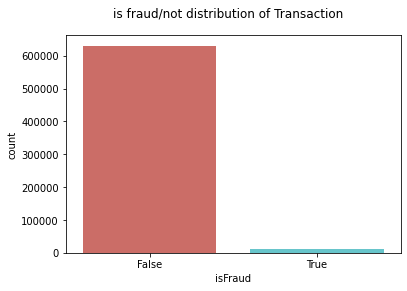

In [ ]:
sns.countplot(x='isFraud',data=df,palette='hls')
plt.suptitle('is fraud/not distribution of Transaction')
plt.show()

Download Dataframe to csv

In [ ]:
df.to_csv('transaction.csv', index=False,sep=',')

In [ ]:
df1=df.copy()
df1['isFraud']=df1['isFraud'].map({True: '1', False: '0'})

In [ ]:
df1=df1.drop(columns=['accountNumber','transactionDateTime','merchantName','merchantCategoryCode','currentExpDate','accountOpenDate','dateOfLastAddressChange',
                     'cardCVV','enteredCVV'])
df1

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,transactionType,isFraud,currentBalance
0,5000,5000.00,111.33,05,01,PURCHASE,1,0.00
1,5000,4888.67,24.75,09,01,PURCHASE,0,111.33
2,5000,4863.92,187.40,05,01,PURCHASE,0,136.08
3,5000,4676.52,227.34,02,01,PURCHASE,1,323.48
4,5000,4449.18,0.00,02,01,ADDRESS_VERIFICATION,0,550.82
...,...,...,...,...,...,...,...,...
641909,7500,2574.02,5.37,05,08,PURCHASE,0,4925.98
641910,7500,2568.65,223.70,09,01,PURCHASE,0,4931.35
641911,7500,2344.95,138.42,02,01,PURCHASE,0,5155.05
641912,7500,2206.53,16.31,09,08,PURCHASE,0,5293.47


In [ ]:
df1.dtypes

creditLimit            int64
availableMoney       float64
transactionAmount    float64
posEntryMode          object
posConditionCode      object
transactionType       object
isFraud               object
currentBalance       float64
dtype: object

In [ ]:
df1.groupby('isFraud').mean()

,creditLimit,availableMoney,transactionAmount,currentBalance
isFraud,,,,
0,10692.060253,6654.531983,133.416128,4037.528270
1,10984.582375,6557.784267,232.603744,4426.798107


Relationship Analysis

In [ ]:
df2=df1.copy()
df2=pd.get_dummies(df1, drop_first=True)

In [ ]:
df2.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'posEntryMode_05', 'posEntryMode_09', 'posEntryMode_80',
       'posEntryMode_90', 'posConditionCode_08', 'posConditionCode_99',
       'transactionType_PURCHASE', 'transactionType_REVERSAL', 'isFraud_1'],
      dtype='object')

In [ ]:
df2.corr()['isFraud_1'].sort_values()

posEntryMode_05            -0.053637
posConditionCode_08        -0.013708
posEntryMode_80            -0.003247
availableMoney             -0.001379
transactionType_REVERSAL    0.000638
posEntryMode_90             0.003158
creditLimit                 0.003357
currentBalance              0.008611
transactionType_PURCHASE    0.010497
posConditionCode_99         0.014157
posEntryMode_09             0.051275
transactionAmount           0.088708
isFraud_1                   1.000000
Name: isFraud_1, dtype: float64

In [ ]:
df2_corr = df2.corr()['isFraud_1'].abs()
to_drop = [column for column in df2.columns if df2_corr[column] < 0.01]
to_drop

['creditLimit',
 'availableMoney',
 'currentBalance',
 'posEntryMode_80',
 'posEntryMode_90',
 'transactionType_REVERSAL']

In [ ]:
df3 = df2.copy()
df3 = df2.drop(to_drop,axis=1)
df3

,transactionAmount,posEntryMode_05,posEntryMode_09,posConditionCode_08,posConditionCode_99,transactionType_PURCHASE,isFraud_1
0,111.33,1,0,0,0,1,1
1,24.75,0,1,0,0,1,0
2,187.40,1,0,0,0,1,0
3,227.34,0,0,0,0,1,1
4,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...
641909,5.37,1,0,1,0,1,0
641910,223.70,0,1,0,0,1,0
641911,138.42,0,0,0,0,1,0
641912,16.31,0,1,1,0,1,0


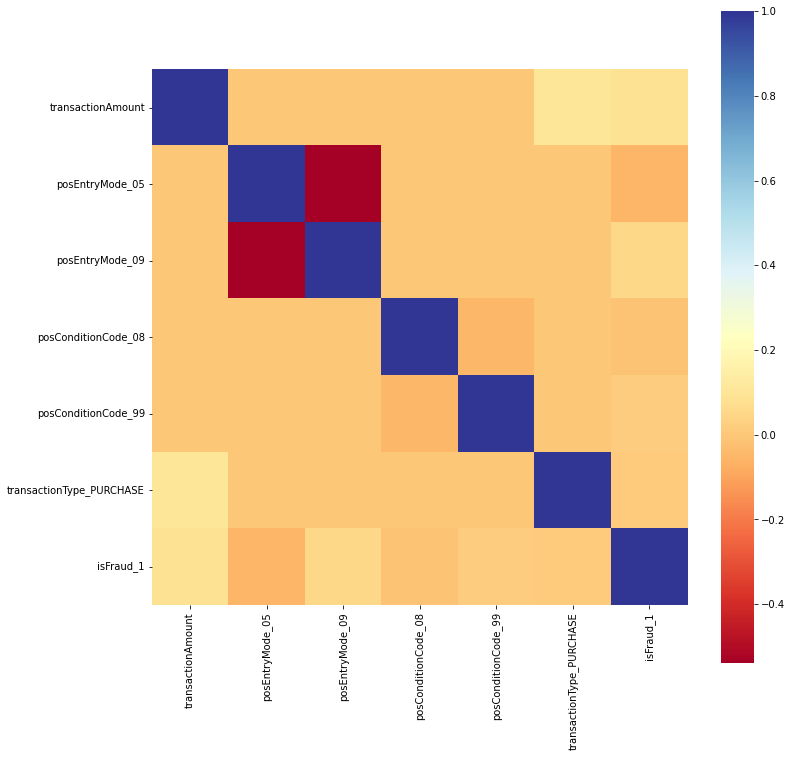

In [ ]:
corrmat = df3.corr(method='pearson')
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat , square=True, cmap='RdYlBu');

In [ ]:
# separating the data for analysis
legit = df3[df3.isFraud_1 == 0]
fraud = df3[df3.isFraud_1 == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(630612, 7)
(11302, 7)


In [ ]:
# statistical measures of the data
legit.transactionAmount.describe()

count    630612.000000
mean        133.416128
std         145.583066
min           0.000000
25%          31.810000
50%          84.340000
75%         186.440000
max        1825.250000
Name: transactionAmount, dtype: float64

In [ ]:
fraud.transactionAmount.describe()

count    11302.000000
mean       232.603744
std        189.654934
min          0.000000
25%         91.475000
50%        185.215000
75%        324.817500
max       1743.510000
Name: transactionAmount, dtype: float64

In [ ]:
# compare the values for both transactions
df3.groupby('isFraud_1').mean()

,transactionAmount,posEntryMode_05,posEntryMode_09,posConditionCode_08,posConditionCode_99,transactionType_PURCHASE
isFraud_1,,,,,,
0,133.416128,0.406941,0.297815,0.190007,0.009128,0.948843
1,232.603744,0.206866,0.476641,0.149177,0.019466,0.966378


In [ ]:
# Define X and y
X = df3.drop(columns='isFraud_1', axis=1)
y = df3[['isFraud_1']]

In [ ]:
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((449339, 6), (192575, 6), (449339, 1), (192575, 1))

In [ ]:
# building the model and fitting the data
log_reg = sm.Logit(y.astype(float), X.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.103237
         Iterations 9


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              isFraud_1   No. Observations:               641914
Model:                          Logit   Df Residuals:                   641908
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 -0.1656
Time:                        16:08:10   Log-Likelihood:                -66269.
converged:                       True   LL-Null:                       -56856.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
transactionAmount            0.0014   4.66e-05     30.830      0.000       0.001       0.002
posEntryMode_05             -2.2250      0.022   -100.316      0.000      -2.269      -2.

Test accuracy =  0.9764455406984291


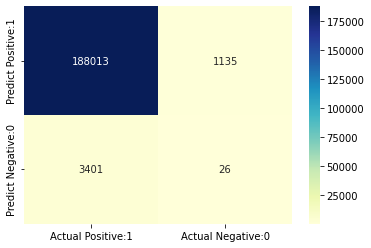

In [ ]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

from sklearn.metrics import (confusion_matrix,accuracy_score)

# confusion matrix
cm = confusion_matrix(y_test, prediction)
cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    189148
           1       0.02      0.01      0.01      3427

    accuracy                           0.98    192575
   macro avg       0.50      0.50      0.50    192575
weighted avg       0.97      0.98      0.97    192575



In [ ]:
to_drop = ['posConditionCode_99']
X_test = X_test.drop(to_drop,axis=1)
X_train = X_train.drop(to_drop,axis=1)

In [ ]:
# building the model and fitting the data
log_reg = sm.Logit(y_train.astype(float), X_train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.102899
         Iterations 9


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              isFraud_1   No. Observations:               449339
Model:                          Logit   Df Residuals:                   449334
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 -0.1660
Time:                        16:09:37   Log-Likelihood:                -46237.
converged:                       True   LL-Null:                       -39653.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
transactionAmount            0.0014   5.63e-05     24.518      0.000       0.001       0.001
posEntryMode_05             -2.2252      0.027    -83.545      0.000      -2.277      -2.

Resampling Data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train2, y_train2 = sm.fit_resample(X, y.values.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train2.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train2 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train2 == 0)))


After OverSampling, the shape of train_X: (1261224, 6)
After OverSampling, the shape of train_y: (1261224,) 

After OverSampling, counts of label '1': 630612
After OverSampling, counts of label '0': 630612


In [ ]:
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
sm_data_X,sm_data_y=sm.fit_resample(X_train, y_train)
sm_data_X = pd.DataFrame(data=sm_data_X,columns=columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=['y'])

In [ ]:
(sm_data_X.shape, sm_data_y.shape)

((882928, 6), (882928, 1))

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train2.astype(float),X_train2.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.615294
         Iterations 6
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.112       
Dependent Variable:    y                  AIC:                1552060.3466
Date:                  2022-07-12 16:13   BIC:                1552132.6322
No. Observations:      1261224            Log-Likelihood:     -7.7602e+05 
Df Model:              5                  LL-Null:            -8.7421e+05 
Df Residuals:          1261218            LLR p-value:        0.0000      
Converged:             1.0000             Scale:              1.0000      
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                          Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
transactionAmount         0.

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train2, y_train2.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.99      0.63      0.77    189148
           1       0.03      0.67      0.06      3427

    accuracy                           0.63    192575
   macro avg       0.51      0.65      0.41    192575
weighted avg       0.97      0.63      0.75    192575



Test accuracy =  0.6270388160456964


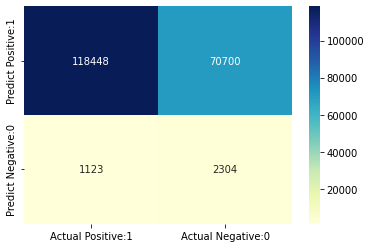

In [ ]:
yhat1 = lr1.predict(X_test)
prediction = list(map(round, yhat1))
# confusion matrix
cm1 = confusion_matrix(y_test, prediction)
cm1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm1, annot=True, fmt='d', cmap='YlGnBu')

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))